#   Image segmentation with the Watershed algorithm
[Opencv Officila Tutorial](https://docs.opencv.org/4.x/d2/dbd/tutorial_distance_transform.html)

## Why Watershed ?
This algorithm is very usefful to detect the objects that touch in edges and ovelap .   
Follwing the next we will be able to achive the above result  : 

<div style="display: flex; justify-content: center;grid-gap:10px">
  <img src="https://gitlab.com/MhadhbiXissam/issammhadhbi/-/raw/main/files/Watershed_Algorithm_0.png" alt="Input">
   
  <img src="https://gitlab.com/MhadhbiXissam/issammhadhbi/-/raw/main/files/Watershed_Algorithm_1.png" alt="Output">
</div>

## How Watershed work ?
* Watershed algorithm takes as an input `gray` images .
* .....

### Read image

Image shape :  (187, 258, 3) dtype =  uint8


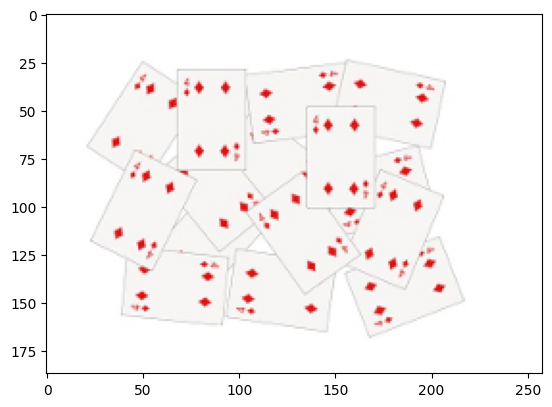

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL , urllib
import numpy as np 
import cv2 as cv 
fig = plt.figure()

url_img = "https://gitlab.com/MhadhbiXissam/issammhadhbi/-/raw/main/files/Watershed_Algorithm_0.png"
img = np.array(PIL.Image.open(urllib.request.urlopen(url_img)).convert('RGB'))
plt.imshow(img)
print("Image shape : " , img.shape ,"dtype = " ,img.dtype)


#  Remove white background : 
*   src == 255 will create array with same size of src where its eleme,t bool represent if each value is 255
*   np.all(src == 255 , axis = 2 ) will check if the bool is all([by 3 element]) will return array of bool if each pixel is all([i  == 255 for i in pixelRGB]) src = [[...[axis=2]..]]
*   src[arry] : passing array of bool will make the subscript applies only when the item is True 

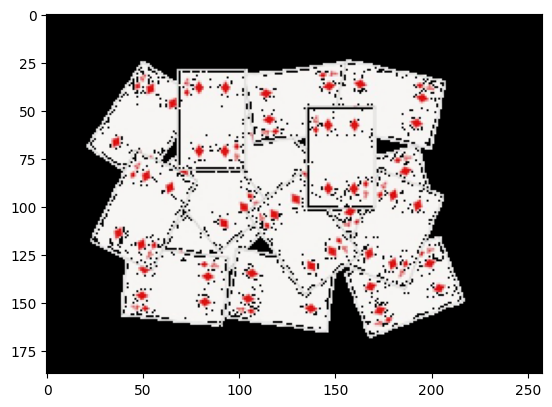

In [4]:
# some black pixels has values < 10 
img[np.all(img > 245, axis= 2 )] = 0
u = plt.imshow(img)

# Sharpen Edges  using Laplacian : 
*   consider kernel = [[1,1,1];[1,-8,1];[1,1,1]] , of type  = np.float32
*   always pass src as float32 then clip to back to origan depth range 

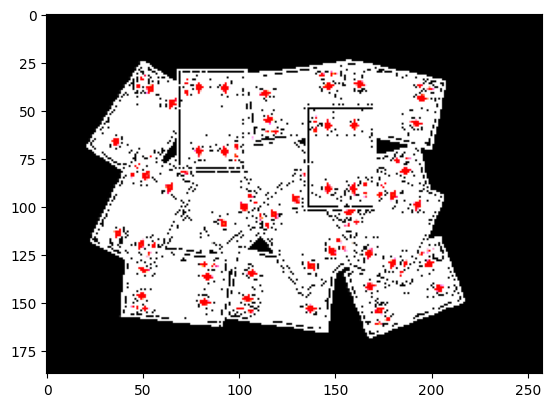

In [5]:
sh = np.float32(img) - cv.filter2D(img,cv.CV_32F , np.array([[1,1,1],[1,-8,-1],[1,1,1]],dtype = np.float32)) 
sh = np.clip(sh,0,255).astype('uint8')
u = plt.imshow(sh)

# Apply Threshold 
*   applying treeshold must be applied on gray 
*   always consider flag `cv.cv.THRESH_OTSU` to interploate inter treeshold
```python 
_, bw = cv.threshold(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
```

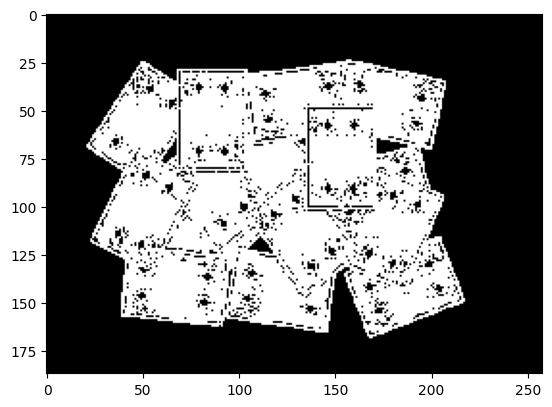

In [7]:
gray = cv.cvtColor(sh,cv.COLOR_BGR2GRAY)
_ , bw = cv.threshold(gray,40,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
u = plt.imshow(bw , cmap='gray')